## Projek Prediksi Harga Tiket Pesawat pada suatu situs 🤨 🧐 
#### 1. Business Understanding 😇 
Disini saya ingin mencoba untuk memprediksi harga tiket pesawat di India 😆😆😆. Prediksi harga tiket pesawat menjadi krusial dalam industri penerbangan untuk membantu penumpang dan perusahaan penerbangan dalam perencanaan perjalanan dan strategi harga yang efektif 😱😱. Permasalahan yang ingin diselesaikan meliputi pemahaman terhadap faktor-faktor apa yang memengaruhi fluktuasi harga tiket pesawat, seperti musim perjalanan, maskapai penerbangan, rute penerbangan, dan waktu keberangkatan. Dengan membangun model prediksi yang akurat, kita dapat membantu penumpang mendapatkan perkiraan harga tiket yang lebih baik sebelum memesan, sementara perusahaan penerbangan dapat menggunakan informasi ini untuk mengoptimalkan strategi harga mereka. Proyek ini juga bertujuan untuk memberikan wawasan yang lebih baik kepada masyarakat tentang dinamika harga tiket pesawat dan menjelaskan konsep machine learning dalam konteks yang relevan dengan industri penerbangan. Maka dari itu salah satu solusi yang bisa saya buat yaitu model prediksi (kalau bisa sampai tahap deploy dengan azure/aws). Pada kernel ini sebagian besar saya akan menggunakan beberapa teknik dari regresi linear. Ayoo 🫡


#### 2. Data Understanding 😁
Dataset tiket pesawat tahun 2019 di India merupakan kumpulan data yang berisi informasi tentang harga tiket pesawat untuk berbagai maskapai dan rute penerbangan di India. Fitur-fitur dalam dataset ini meliputi informasi seperti maskapai penerbangan, tanggal keberangkatan, bandara keberangkatan dan tujuan, rute penerbangan, waktu keberangkatan dan kedatangan, durasi penerbangan, jumlah perhentian, informasi tambahan tentang penerbangan, serta harga tiket. Dataset ini dapat digunakan untuk memprediksi atau menganalisis faktor-faktor apa yang mempengaruhi harga tiket pesawat di India pada tahun 2019, seperti musim perjalanan, popularitas maskapai, atau waktu keberangkatan.

- Airline: maskapai penerbangan yang beroperasi untuk penerbangan tertentu. Maskapai ini dapat mempengaruhi harga tiket berdasarkan reputasi, jenis layanan, dan popularitas.
- Date_of_Journey: tanggal keberangkatan penerbangan. Harga tiket pesawat dapat bervariasi berdasarkan musim, hari dalam seminggu, atau hari libur.
- Source: kota atau bandara keberangkatan dari penerbangan. Harga tiket juga bisa dipengaruhi oleh popularitas rute tertentu.
- Destination: kota atau bandara tujuan dari penerbangan. Seperti source, harga tiket bisa berbeda tergantung pada tujuan akhir.
- Route: rute penerbangan yang meliputi perhentian atau transfer yang mungkin dilakukan. Jumlah dan jenis perhentian dapat mempengaruhi harga.
- Dep_Time: waktu keberangkatan pesawat. Harga tiket bisa bervariasi tergantung pada waktu keberangkatan (pagi, siang, malam).
- Arrival_Time: waktu kedatangan pesawat di tujuan akhir. Durasi perjalanan bisa mempengaruhi harga tiket.
- Duration: Durasi penerbangan dari keberangkatan hingga kedatangan. Durasi yang lebih pendek atau lebih lama dapat mempengaruhi harga tiket.
- Total_Stops: Jumlah perhentian selama penerbangan. Harga tiket biasanya lebih mahal untuk penerbangan non-stop dibandingkan dengan yang berhenti di beberapa tempat.

- Additional_Info: Informasi tambahan tentang penerbangan seperti layanan khusus, aturan bagasi, atau keterangan lainnya. Ini mungkin mempengaruhi harga tiket.
- Price: target atau variabel yang ingin diprediksi. Harga tiket pesawat adalah variabel kontinu yang ingin diestimasi berdasarkan fitur-fitur lain dalam dataset.

#### 3. Data Preparation: Feature Engineering 😢
- Outlier Removal
- Analisis Unvariate dan Bivariate

#### 4. Modelling 😨 😰
- Decision Tree Regressor
- Random Forest Regressor
- XGGradient Boost

#### 5. Evaluation 🧐 🤓 😎
- MSE
- RMSE
- R2

😀 😃 😄 😁 😆 😅 😂 🤣 🥲 🥹 ☺️ 😊 😇 🙂 🙃 😉 😌 😍 🥰 😘 😗 😙 😚 😋 😛 😝 😜 🤪 🤨 🧐 🤓 😎 🥸 🤩 🥳 😏 😒 😞 😔 😟 😕 🙁 ☹️ 😣 😖 😫 😩 🥺 😢 😭 😮‍💨 😤 😠 😡 🤬 🤯 😳 🥵 🥶 😱 😨 😰 😥 😓 🫣 🤗 🫡 🤔 🫢 🤭 🤫 🤥 😶 😶‍🌫️ 😐 😑 😬 🫨 🫠 🙄 😯 😦 😧 😮 😲 🥱 😴 🤤 😪 😵 😵‍💫 🫥 🤐 🥴 🤢 🤮 🤧 😷 🤒 🤕 🤑 🤠 😈 👿 👹 👺 🤡 💩 👻 💀 ☠️ 👽 👾 🤖 🎃 😺 😸 😹 😻 😼 😽 🙀 😿 😾✅❌

- Grafik Linear
- analisa unvariate dan bivariate
- Modeling

In [158]:
import os
import glob
import json
import pickle
import folium
import plotly
%matplotlib inline
from math import sqrt
from pyforest import *

import cufflinks as cf
import branca.colormap as cm
from datetime import datetime
plt.style.use("fivethirtyeight")
from cufflinks.offline import go_offline
from plotly.offline import plot, iplot, init_notebook_mode, download_plotlyjs
init_notebook_mode(connected=True)
cf.go_offline()

from sklearn.pipeline import make_pipeline
from mlxtend.evaluate import bias_variance_decomp
from sklearn.feature_selection import RFE, SelectKBest, f_regression, RFECV
from sklearn.preprocessing import OneHotEncoder, StandardScaler, PolynomialFeatures

from sklearn import tree
from functools import partial
from xgboost import XGBRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.feature_selection import mutual_info_regression
from sklearn.linear_model import LinearRegression, ElasticNet
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.model_selection import validation_curve, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, make_scorer


import warnings
from warnings import filterwarnings
filterwarnings("ignore")

<IPython.core.display.Javascript object>

In [2]:
folder_path = 'kode/projek/Tiket_Pesawat/'
os.listdir(folder_path)
tr= pd.read_excel(os.path.join(folder_path, 'Plane_ticket.xlsx'))

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [3]:
tr

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897.0
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662.0
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882.0
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218.0
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302.0
...,...,...,...,...,...,...,...,...,...,...,...
13349,Air India,6/06/2019,Kolkata,Banglore,CCU → DEL → BLR,20:30,20:25 07 Jun,23h 55m,1 stop,No info,NaN
13350,IndiGo,27/03/2019,Kolkata,Banglore,CCU → BLR,14:20,16:55,2h 35m,non-stop,No info,NaN
13351,Jet Airways,6/03/2019,Delhi,Cochin,DEL → BOM → COK,21:50,04:25 07 Mar,6h 35m,1 stop,No info,NaN
13352,Air India,6/03/2019,Delhi,Cochin,DEL → BOM → COK,04:00,19:15,15h 15m,1 stop,No info,NaN


### EDA 😵‍💫😵‍💫

In [4]:
tr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13354 entries, 0 to 13353
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Airline          13354 non-null  object 
 1   Date_of_Journey  13354 non-null  object 
 2   Source           13354 non-null  object 
 3   Destination      13354 non-null  object 
 4   Route            13353 non-null  object 
 5   Dep_Time         13354 non-null  object 
 6   Arrival_Time     13354 non-null  object 
 7   Duration         13354 non-null  object 
 8   Total_Stops      13353 non-null  object 
 9   Additional_Info  13354 non-null  object 
 10  Price            10683 non-null  float64
dtypes: float64(1), object(10)
memory usage: 1.1+ MB


In [5]:
# info
tr.describe()

,Price
count,10683.000000
mean,9087.064121
std,4611.359167
min,1759.000000
25%,5277.000000
50%,8372.000000
75%,12373.000000
max,79512.000000


#### Data Wrangling

In [6]:
tr.isnull().sum()

Airline               0
Date_of_Journey       0
Source                0
Destination           0
Route                 1
Dep_Time              0
Arrival_Time          0
Duration              0
Total_Stops           1
Additional_Info       0
Price              2671
dtype: int64

In [7]:
tr['Total_Stops'].isnull().sum()

1

In [8]:
tr[tr['Total_Stops'].isnull()]

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
9039,Air India,6/05/2019,Delhi,Cochin,NaN,09:45,09:25 07 May,23h 40m,NaN,No info,7480.0


In [9]:
tr.dropna(inplace=True)

In [10]:
tr.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

In [11]:
tr.dtypes

Airline             object
Date_of_Journey     object
Source              object
Destination         object
Route               object
Dep_Time            object
Arrival_Time        object
Duration            object
Total_Stops         object
Additional_Info     object
Price              float64
dtype: object

In [12]:
tr.info(memory_usage="deep")

<class 'pandas.core.frame.DataFrame'>
Index: 10682 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Airline          10682 non-null  object 
 1   Date_of_Journey  10682 non-null  object 
 2   Source           10682 non-null  object 
 3   Destination      10682 non-null  object 
 4   Route            10682 non-null  object 
 5   Dep_Time         10682 non-null  object 
 6   Arrival_Time     10682 non-null  object 
 7   Duration         10682 non-null  object 
 8   Total_Stops      10682 non-null  object 
 9   Additional_Info  10682 non-null  object 
 10  Price            10682 non-null  float64
dtypes: float64(1), object(10)
memory usage: 7.2 MB


In [13]:
data = tr.copy()

In [14]:
data.head(5)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897.0
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662.0
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882.0
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218.0
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302.0


ada 3 kolom yang merupakan suatu waktu. fungsi??

In [15]:
def ganti_ke_datetime(col):
    data[col] = pd.to_datetime(data[col])

In [16]:
data.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

In [17]:
for features in ['Dep_Time', 'Arrival_Time', 'Date_of_Journey']:
    ganti_ke_datetime(features)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [18]:
data.dtypes

Airline                    object
Date_of_Journey    datetime64[ns]
Source                     object
Destination                object
Route                      object
Dep_Time           datetime64[ns]
Arrival_Time       datetime64[ns]
Duration                   object
Total_Stops                object
Additional_Info            object
Price                     float64
dtype: object

In [19]:
data['Journey_day'] = data['Date_of_Journey'].dt.day
data['Journey_month'] = data['Date_of_Journey'].dt.month
data['Journey_year'] = data['Date_of_Journey'].dt.year

hmm kital liat model belum tentu memahami suatu kolom seperti dep_time arrival_time yang merupakan datetime. kayaknya kita perlu untuk memecahnya menjadi lebih spesifik.

In [20]:
def ekstrak_jam_menit(df, col):
    df[col+"_hour"] = df[col].dt.hour
    df[col+"_minute"] = df[col].dt.minute
    return df.head(5)

In [21]:
ekstrak_jam_menit(data, "Dep_Time")

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Journey_year,Dep_Time_hour,Dep_Time_minute
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2024-04-18 22:20:00,2024-03-22 01:10:00,2h 50m,non-stop,No info,3897.0,24,3,2019,22,20
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,2024-04-18 05:50:00,2024-04-18 13:15:00,7h 25m,2 stops,No info,7662.0,1,5,2019,5,50
2,Jet Airways,2019-06-09,Delhi,Cochin,DEL → LKO → BOM → COK,2024-04-18 09:25:00,2024-06-10 04:25:00,19h,2 stops,No info,13882.0,9,6,2019,9,25
3,IndiGo,2019-05-12,Kolkata,Banglore,CCU → NAG → BLR,2024-04-18 18:05:00,2024-04-18 23:30:00,5h 25m,1 stop,No info,6218.0,12,5,2019,18,5
4,IndiGo,2019-03-01,Banglore,New Delhi,BLR → NAG → DEL,2024-04-18 16:50:00,2024-04-18 21:35:00,4h 45m,1 stop,No info,13302.0,1,3,2019,16,50


In [22]:
ekstrak_jam_menit(data, "Arrival_Time")

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Journey_year,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2024-04-18 22:20:00,2024-03-22 01:10:00,2h 50m,non-stop,No info,3897.0,24,3,2019,22,20,1,10
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,2024-04-18 05:50:00,2024-04-18 13:15:00,7h 25m,2 stops,No info,7662.0,1,5,2019,5,50,13,15
2,Jet Airways,2019-06-09,Delhi,Cochin,DEL → LKO → BOM → COK,2024-04-18 09:25:00,2024-06-10 04:25:00,19h,2 stops,No info,13882.0,9,6,2019,9,25,4,25
3,IndiGo,2019-05-12,Kolkata,Banglore,CCU → NAG → BLR,2024-04-18 18:05:00,2024-04-18 23:30:00,5h 25m,1 stop,No info,6218.0,12,5,2019,18,5,23,30
4,IndiGo,2019-03-01,Banglore,New Delhi,BLR → NAG → DEL,2024-04-18 16:50:00,2024-04-18 21:35:00,4h 45m,1 stop,No info,13302.0,1,3,2019,16,50,21,35


In [23]:
kolom_dihapus = ['Arrival_Time', 'Dep_Time']

In [24]:
data.drop(kolom_dihapus, axis=1, inplace=True)

eda: kapan sebagian besar dari pesawat take-off atau berangkat?

In [25]:
def waktu_berangkat(x):
    if (x>4) and (x<=10):
        return "Pagi"
    elif (x>10) and (x<=15):
        return "Siang"
    elif (x>15) and (x<=18):
        return "Sore"
    elif (x>18) and (x<=21):
        return "Malam"
    elif (x>22) and (x<=24):
        return "Tengah Malam"
    else:
        return "Subuh"

<Axes: xlabel='Dep_Time_hour'>

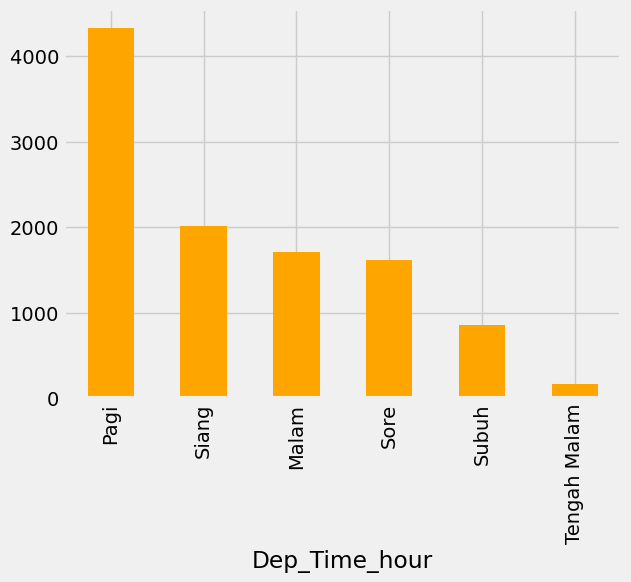

In [26]:
data['Dep_Time_hour'].apply(waktu_berangkat).value_counts().plot(kind='bar', color='orange')

In [29]:
data['Dep_Time_hour'].apply(waktu_berangkat).value_counts().iplot(kind='bar')

In [30]:
data.head(5)

,Airline,Date_of_Journey,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Journey_year,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897.0,24,3,2019,22,20,1,10
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662.0,1,5,2019,5,50,13,15
2,Jet Airways,2019-06-09,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882.0,9,6,2019,9,25,4,25
3,IndiGo,2019-05-12,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218.0,12,5,2019,18,5,23,30
4,IndiGo,2019-03-01,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302.0,1,3,2019,16,50,21,35


#### eda: 
Apakah fitur Duration itu berpengaruh terhadap target yaitu Harga/Price atau tidak

kita benerin dulu kolom Duration (2h 50m). sehingga ketika ngebenarin datanya, itu akan berulang kali. seperti ada aja data yang hanya punya hour, dan ada juga yang hnya minute.

In [31]:
def benarin_durasi(x):
    if 'h' not in x:
        x = '0h' + ' ' + x
    elif 'm' not in x:
        x = x + ' ' + '0m'
    return x

In [32]:
data['Duration'] = data['Duration'].apply(benarin_durasi)

In [33]:
data['Duration'][0]

'2h 50m'

In [34]:
'2h 50m'.split(' ')

['2h', '50m']

In [35]:
int('2h 50m'.split(' ')[0][0:-1]) #akses indeks ke-0, tapi yang indeks -1 itu tidak diselect

2

In [36]:
int('2h 50m'.split(' ')[1][0:-1])

50

In [37]:
data['Duration_hours'] = data['Duration'].apply(lambda x: int(x.split(' ')[0][0:-1])) # fungsi sederhana dan singkat

In [38]:
data['Duration_mins'] = data['Duration'].apply(lambda x: int(x.split(' ')[1][0:-1]))

In [39]:
data.head(5)

,Airline,Date_of_Journey,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Journey_year,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hours,Duration_mins
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897.0,24,3,2019,22,20,1,10,2,50
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662.0,1,5,2019,5,50,13,15,7,25
2,Jet Airways,2019-06-09,Delhi,Cochin,DEL → LKO → BOM → COK,19h 0m,2 stops,No info,13882.0,9,6,2019,9,25,4,25,19,0
3,IndiGo,2019-05-12,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218.0,12,5,2019,18,5,23,30,5,25
4,IndiGo,2019-03-01,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302.0,1,3,2019,16,50,21,35,4,45


In [40]:
data.dtypes

Airline                        object
Date_of_Journey        datetime64[ns]
Source                         object
Destination                    object
Route                          object
Duration                       object
Total_Stops                    object
Additional_Info                object
Price                         float64
Journey_day                     int32
Journey_month                   int32
Journey_year                    int32
Dep_Time_hour                   int32
Dep_Time_minute                 int32
Arrival_Time_hour               int32
Arrival_Time_minute             int32
Duration_hours                  int64
Duration_mins                   int64
dtype: object

In [41]:
# membuat fitur total menit dari Durasi untuk memudahkan analisis
data['Duration_total_mins'] = ((data['Duration_hours']*60) + (data['Duration_mins']*1))

In [42]:
data['Duration_total_mins']

0         170
1         445
2        1140
3         325
4         285
         ... 
10678     150
10679     155
10680     180
10681     160
10682     500
Name: Duration_total_mins, Length: 10682, dtype: int64

<IPython.core.display.Javascript object>

<Axes: xlabel='Duration_total_mins', ylabel='Price'>

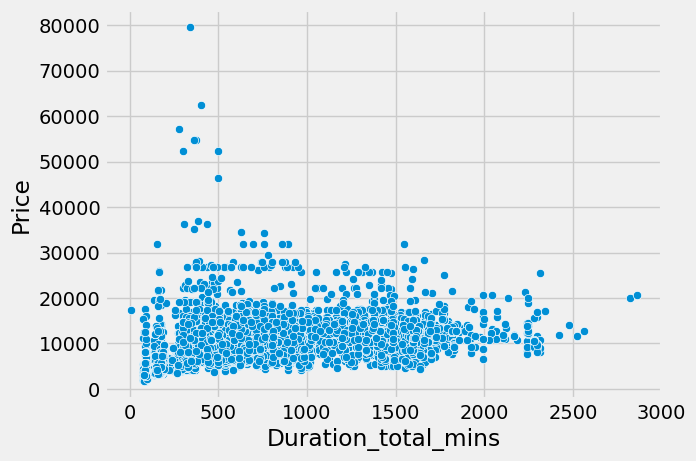

In [43]:
# Fitur durasi dan Price merupakan fitur yang kontinyu, maka menggunakan scatter plot/regresi plot (best fit line)
sns.scatterplot(x="Duration_total_mins", y="Price", data=data)

<IPython.core.display.Javascript object>

<Axes: xlabel='Duration_total_mins', ylabel='Price'>

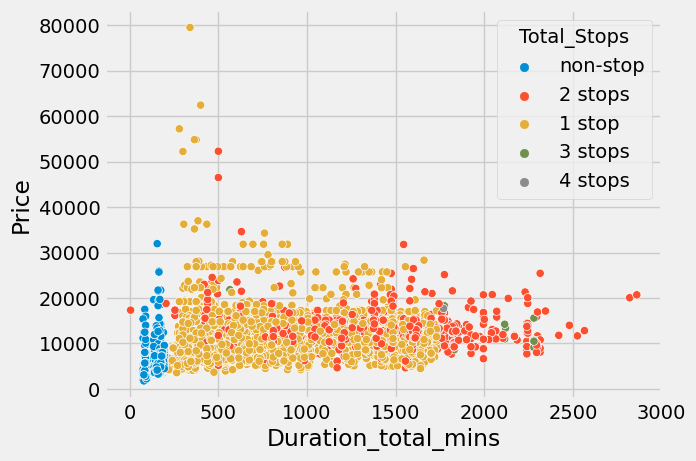

In [44]:
sns.scatterplot(x="Duration_total_mins", y="Price", data=data, hue="Total_Stops")

- Ketika pesawat tidak berhenti (non-stop) maka membutuhkan waktu lebih sebentar untuk sampai
- Semakin total berhenti meningkat maka akan membutuhkan waktu lebih lama dan harga yang lebih mahal

<IPython.core.display.Javascript object>

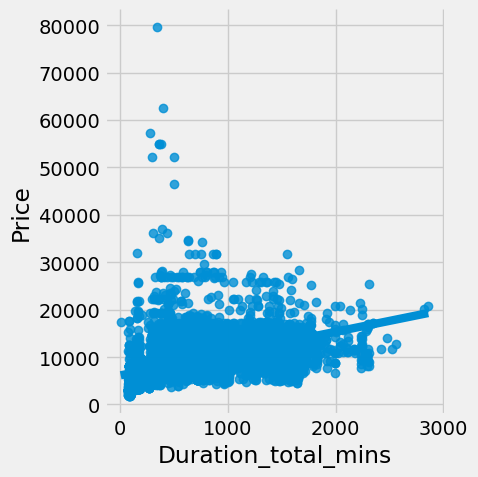

In [45]:
sns.lmplot(x="Duration_total_mins", y="Price", data=data) #regresi line

- Semakin lama durasinya, maka harga tiket semakin mahal

#### analisis univariate - harga tiket (target)

In [46]:
#cari skewness atau condong ke mana
harga_skew = round(data['Price'].skew(), 2)
harga_skew

1.81

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

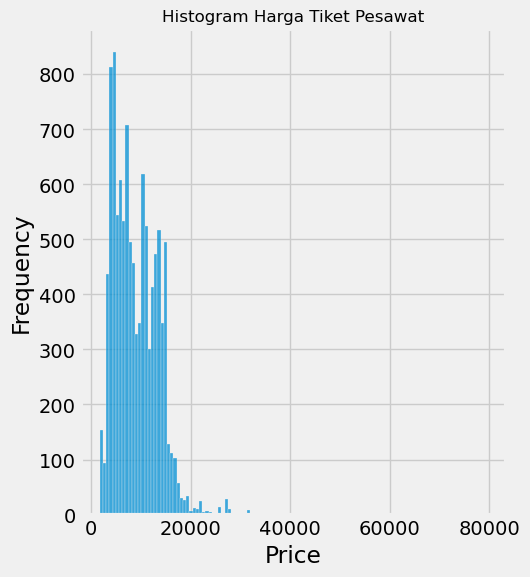

In [47]:
#viz
plt.figure(figsize=(10, 6))
plt.subplot(121)
sns.histplot(data=data,x='Price')
plt.title(f'Histogram Harga Tiket Pesawat',fontsize=12) 
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

#### Analisis Bivariate
- rute manakah yang sering digunakan oleh maskapai Air India?
- Maskapai vs Analisis harga tiket

In [48]:
data['Airline'].value_counts()

Airline
Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: count, dtype: int64

In [49]:
data[data['Airline']=='Air India'].head(5)

,Airline,Date_of_Journey,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Journey_year,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hours,Duration_mins,Duration_total_mins
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662.0,1,5,2019,5,50,13,15,7,25,445
10,Air India,2019-06-01,Delhi,Cochin,DEL → BLR → COK,13h 15m,1 stop,No info,8907.0,1,6,2019,9,45,23,0,13,15,795
12,Air India,2019-06-24,Chennai,Kolkata,MAA → CCU,2h 15m,non-stop,No info,4667.0,24,6,2019,11,40,13,55,2,15,135
15,Air India,2019-03-03,Delhi,Cochin,DEL → AMD → BOM → COK,26h 35m,2 stops,No info,14011.0,3,3,2019,16,40,19,15,26,35,1595
18,Air India,2019-06-12,Delhi,Cochin,DEL → CCU → BOM → COK,23h 0m,2 stops,No info,13381.0,12,6,2019,20,15,19,15,23,0,1380


In [50]:
data[data['Airline']=='Air India'].groupby('Route').size().sort_values(ascending=False) #menggunakan fungsi size

Route
BLR → DEL                      158
DEL → BOM → COK                117
BOM → HYD                       98
DEL → MAA → COK                 77
DEL → COK                       75
                              ... 
BOM → RPR → VTZ → HYD            1
BOM → JDH → JAI → DEL → HYD      1
BOM → JAI → DEL → HYD            1
BOM → IDR → DEL → HYD            1
BLR → HBX → BOM → NAG → DEL      1
Length: 92, dtype: int64

In [51]:
data[data['Airline']=='IndiGo'].groupby('Route').size().sort_values(ascending=False) #menggunakan fungsi size

Route
BLR → DEL                483
CCU → BLR                320
DEL → BOM → COK          302
DEL → HYD → COK          196
BOM → HYD                195
MAA → CCU                184
DEL → COK                 59
DEL → BLR → COK           57
CCU → MAA → BLR           37
DEL → MAA → COK           34
CCU → HYD → BLR           32
CCU → BBI → BLR           19
DEL → HYD → MAA → COK     18
BLR → HYD → DEL           18
DEL → LKO → COK           17
DEL → PNQ → COK           12
CCU → PNQ → BLR           11
CCU → PAT → BLR           10
CCU → NAG → BLR            9
BLR → IDR → DEL            5
DEL → BBI → COK            5
BLR → BOM → DEL            4
CCU → GAU → BLR            3
DEL → AMD → COK            3
BLR → NAG → DEL            3
BLR → LKO → DEL            3
BLR → AMD → DEL            3
DEL → TRV → COK            2
BLR → STV → DEL            2
BLR → GOI → DEL            1
CCU → VTZ → BLR            1
BOM → GOI → HYD            1
CCU → IXA → BLR            1
CCU → BOM → BLR            1
BLR → MA

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

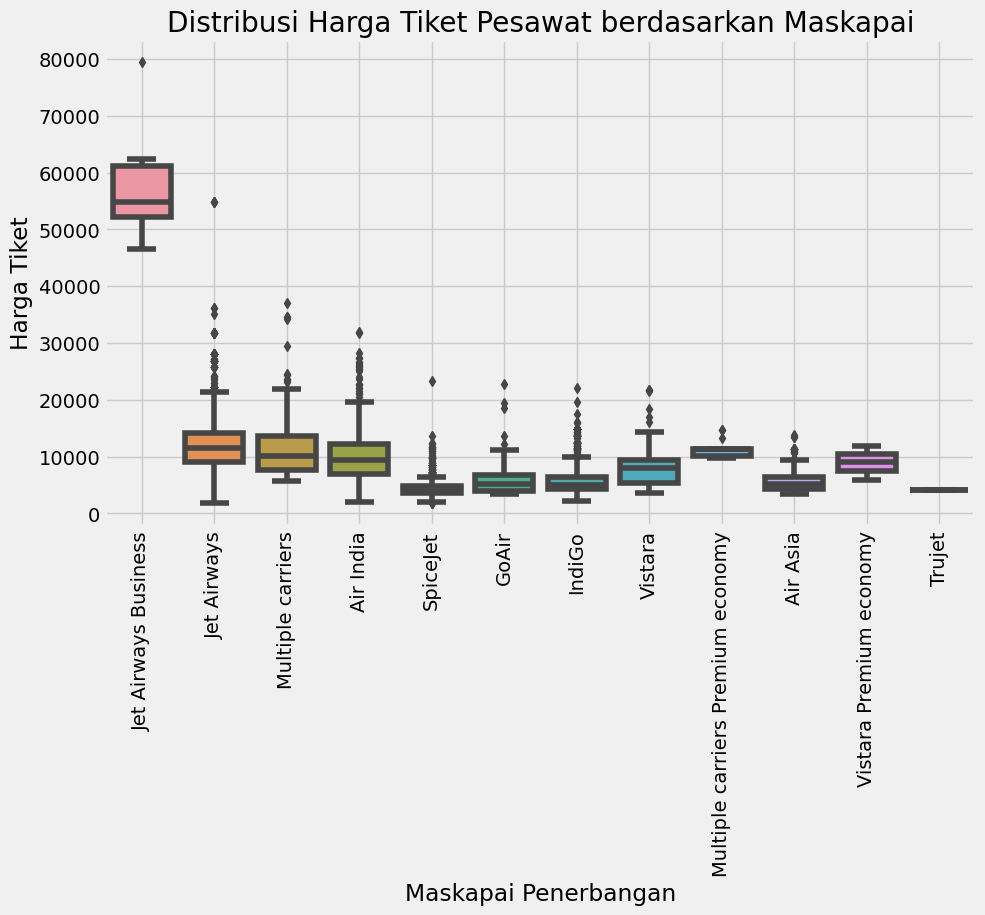

In [52]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Airline', y='Price', data=data.sort_values('Price', ascending=False))

plt.xticks(rotation=90)
plt.title('Distribusi Harga Tiket Pesawat berdasarkan Maskapai')
plt.xlabel('Maskapai Penerbangan')
plt.ylabel('Harga Tiket')
plt.grid(True)

plt.show()

#### analisis faktor kontinyu

In [53]:
cal_col = [col for col in data.columns if data[col].dtype=="object"]
num_col = [col for col in data.columns if data[col].dtype!="object" and data[col].dtype!="datetime64[ns]"]

In [54]:
num_col

['Price',
 'Journey_day',
 'Journey_month',
 'Journey_year',
 'Dep_Time_hour',
 'Dep_Time_minute',
 'Arrival_Time_hour',
 'Arrival_Time_minute',
 'Duration_hours',
 'Duration_mins',
 'Duration_total_mins']

In [55]:
cal_col

['Airline',
 'Source',
 'Destination',
 'Route',
 'Duration',
 'Total_Stops',
 'Additional_Info']

In [56]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10682 entries, 0 to 10682
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Airline              10682 non-null  object        
 1   Date_of_Journey      10682 non-null  datetime64[ns]
 2   Source               10682 non-null  object        
 3   Destination          10682 non-null  object        
 4   Route                10682 non-null  object        
 5   Duration             10682 non-null  object        
 6   Total_Stops          10682 non-null  object        
 7   Additional_Info      10682 non-null  object        
 8   Price                10682 non-null  float64       
 9   Journey_day          10682 non-null  int32         
 10  Journey_month        10682 non-null  int32         
 11  Journey_year         10682 non-null  int32         
 12  Dep_Time_hour        10682 non-null  int32         
 13  Dep_Time_minute      10682 non-null 

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

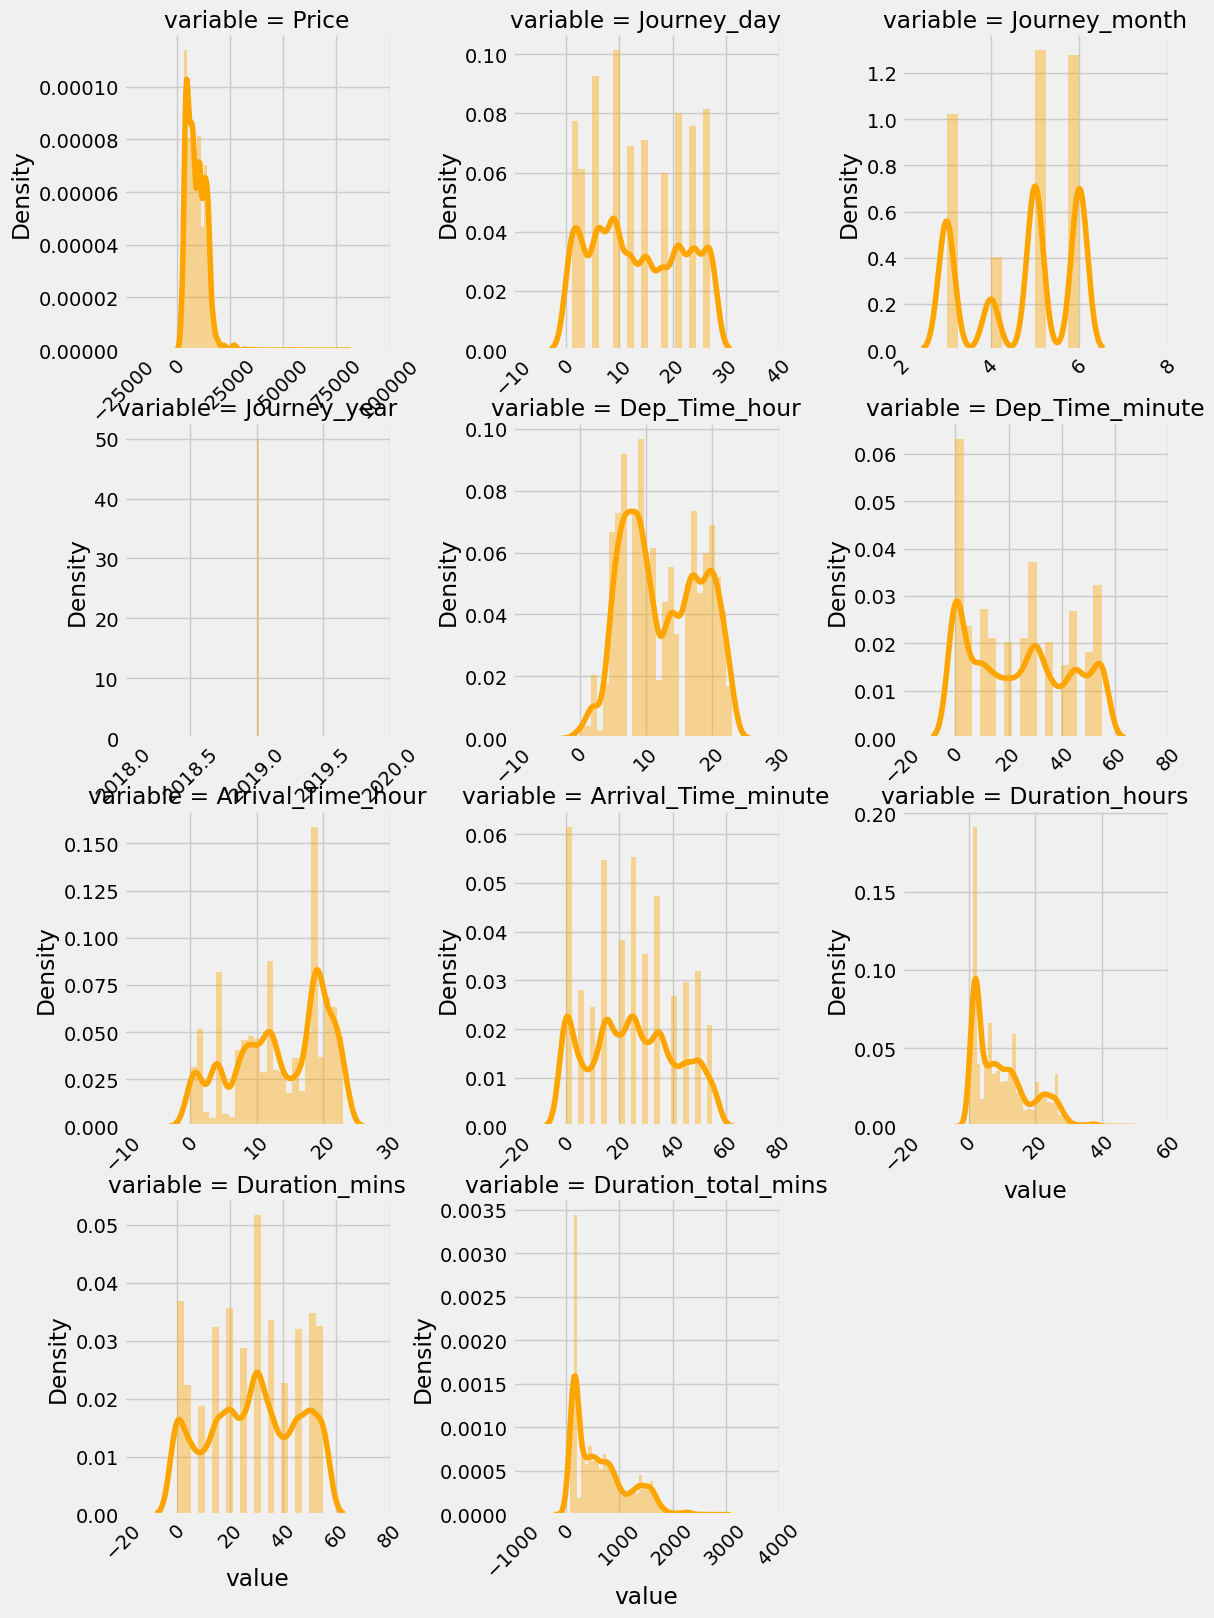

In [57]:
# viz dari persebaran data dari data kontinyu

num_1 = pd.melt(data, value_vars = num_col)
g = sns.FacetGrid(num_1, col='variable', col_wrap=3, sharex=False, sharey=False, height=4)
g = g.map(sns.distplot, 'value', color='orange') #udah coba pake hisplot, displot
g.set_xticklabels(rotation=45)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

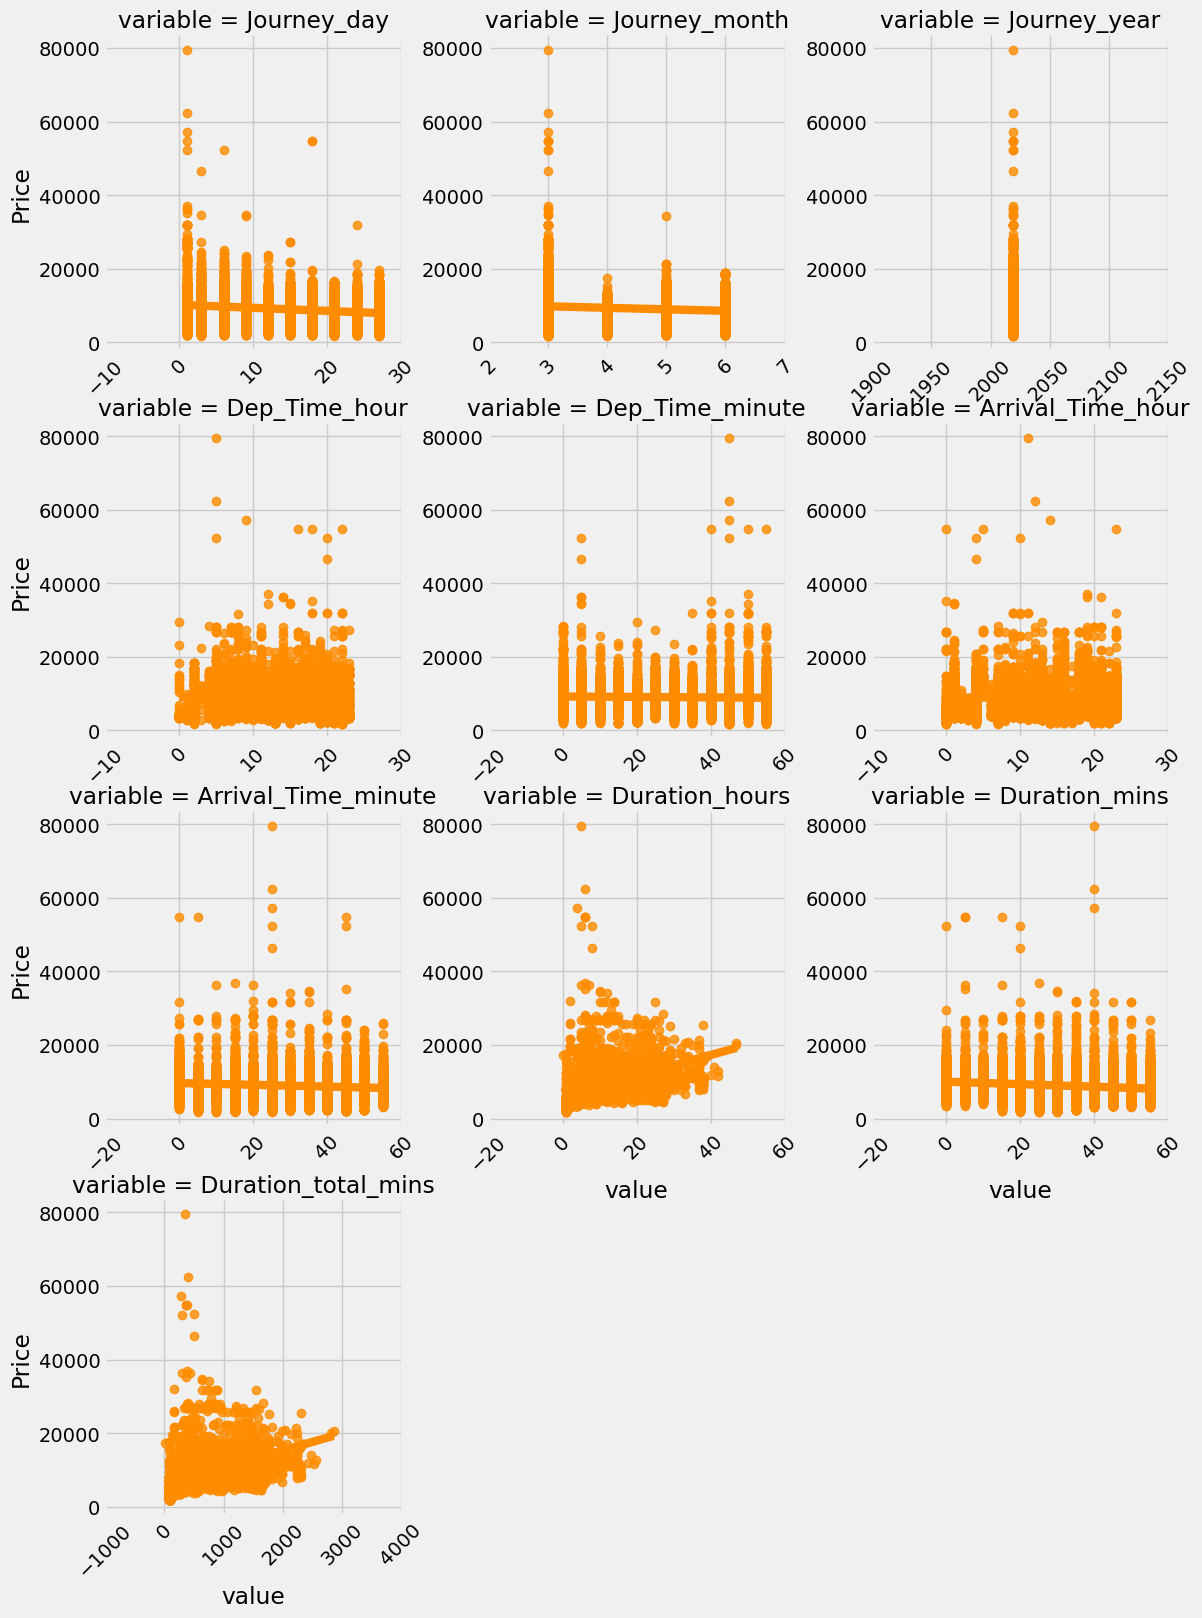

In [58]:
num_2 = pd.melt(data, id_vars='Price', value_vars=num_col)
g = sns.FacetGrid(num_2, col='variable', col_wrap=3, sharex=False, sharey=False, height=4)
g = g.map(sns.regplot, 'value', 'Price', color='darkorange')
g.set_xticklabels(rotation=45)

- kayaknya sebagian besar fiturnya itu agak susah dicari insight menggunakan garis linear deh, memang ada beberapa fitur seperti duration_total mins dan hour. tpi kan kalau logika itu sama aja kolomny. jadi kalau pake linear regression nggak akan terlalu bagus

#### analisis kategorikal

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

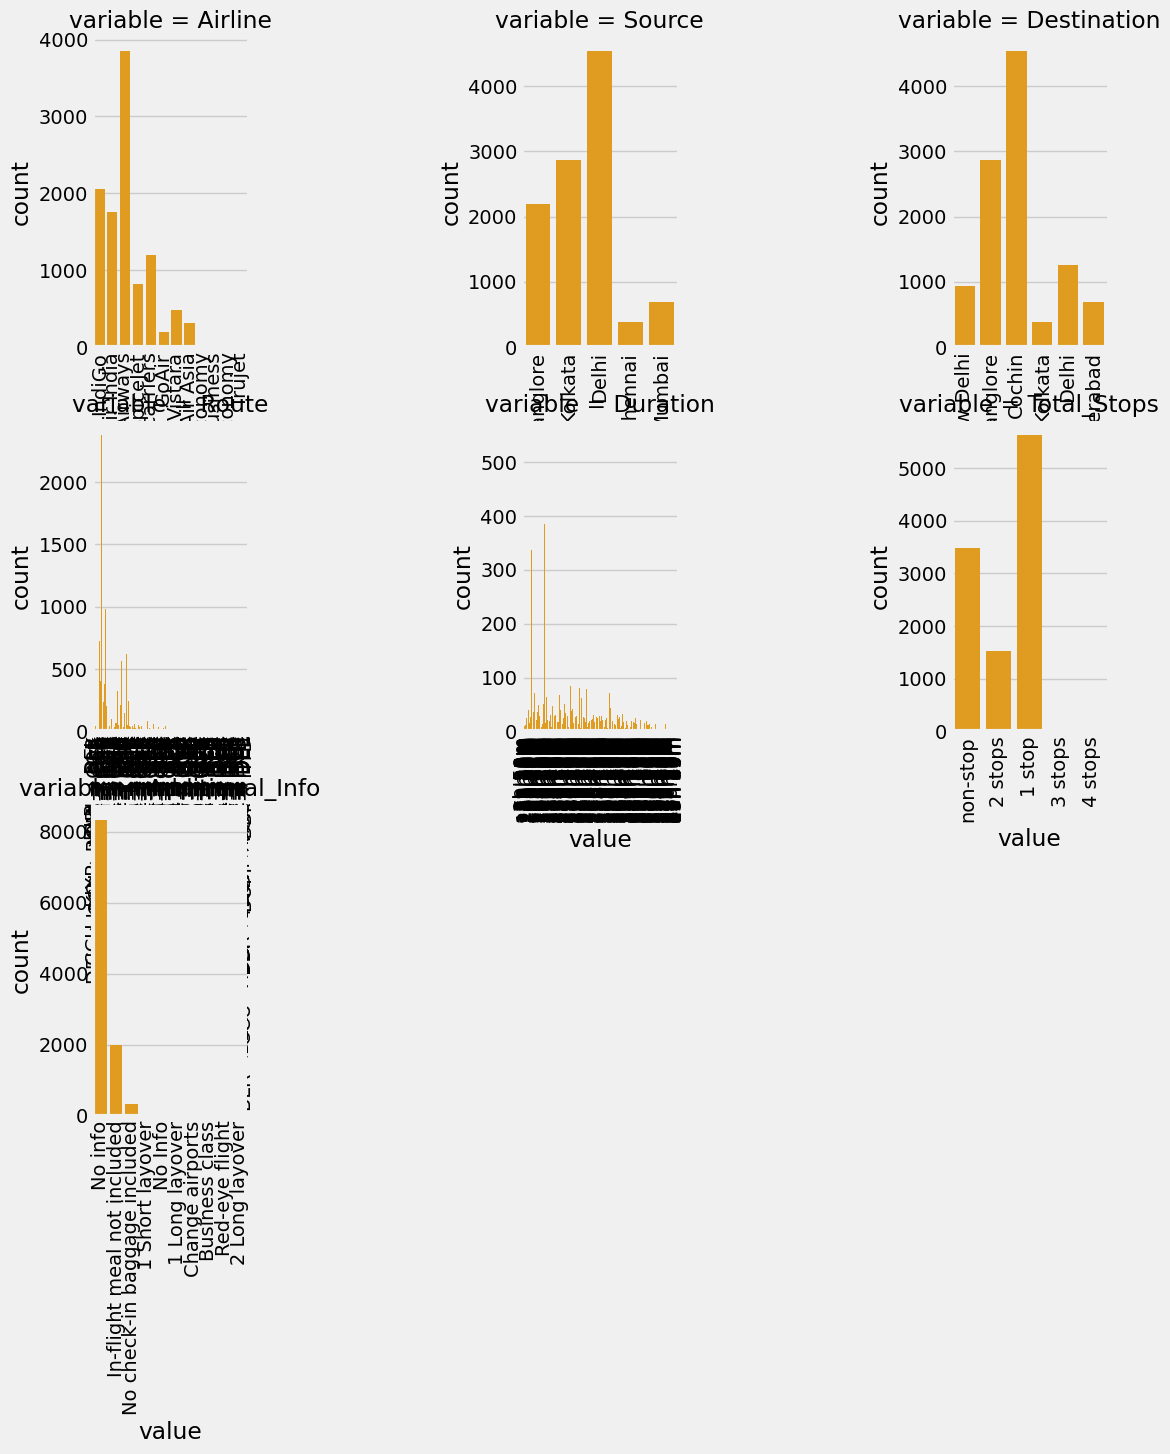

In [59]:
kat_1 = pd.melt(data, value_vars=cal_col)
g = sns.FacetGrid(kat_1, col='variable', col_wrap=3, sharex=False, sharey=False, height=4)
g = g.map(sns.countplot, 'value', color='orange')
g.set_xticklabels(rotation=90)

udah dibuktiin kalau linear regression itu kayaknya ga cocok ga sii?

### Feature Engineering

#### melakukan feature encoding terhadap fitur kategorikal supaya machine dapat mengenalinya. One hot encoding untuk nominal data, kalau data ordinal itu pakai label encoding
- one hot encoding
    - ✅Source
    - ❌ airline
- label encoding
    - Total_Stops
- target guided encoding
    - ✅airline
    - destination

In [60]:
data['Source'].unique()

array(['Banglore', 'Kolkata', 'Delhi', 'Chennai', 'Mumbai'], dtype=object)

In [61]:
data['Source'].apply(lambda x: 1 if x=='Banglore' else  0)

0        1
1        0
2        0
3        0
4        1
        ..
10678    0
10679    0
10680    1
10681    1
10682    0
Name: Source, Length: 10682, dtype: int64

In [62]:
for sub_categori in data['Source'].unique():
    data['Source_'+sub_categori] = data['Source'].apply(lambda x: 1 if x==sub_categori else 0)

In [63]:
data.head(5)

,Airline,Date_of_Journey,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,...,Arrival_Time_hour,Arrival_Time_minute,Duration_hours,Duration_mins,Duration_total_mins,Source_Banglore,Source_Kolkata,Source_Delhi,Source_Chennai,Source_Mumbai
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897.0,24,...,1,10,2,50,170,1,0,0,0,0
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662.0,1,...,13,15,7,25,445,0,1,0,0,0
2,Jet Airways,2019-06-09,Delhi,Cochin,DEL → LKO → BOM → COK,19h 0m,2 stops,No info,13882.0,9,...,4,25,19,0,1140,0,0,1,0,0
3,IndiGo,2019-05-12,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218.0,12,...,23,30,5,25,325,0,1,0,0,0
4,IndiGo,2019-03-01,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302.0,1,...,21,35,4,45,285,1,0,0,0,0


In [64]:
data.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Duration', 'Total_Stops', 'Additional_Info', 'Price', 'Journey_day',
       'Journey_month', 'Journey_year', 'Dep_Time_hour', 'Dep_Time_minute',
       'Arrival_Time_hour', 'Arrival_Time_minute', 'Duration_hours',
       'Duration_mins', 'Duration_total_mins', 'Source_Banglore',
       'Source_Kolkata', 'Source_Delhi', 'Source_Chennai', 'Source_Mumbai'],
      dtype='object')

In [65]:
data.groupby(['Airline'])['Price'].mean().sort_values()

Airline
Trujet                                4140.000000
SpiceJet                              4338.284841
Air Asia                              5590.260188
IndiGo                                5673.682903
GoAir                                 5861.056701
Vistara                               7796.348643
Vistara Premium economy               8962.333333
Air India                             9612.427756
Multiple carriers                    10902.678094
Multiple carriers Premium economy    11418.846154
Jet Airways                          11643.923357
Jet Airways Business                 58358.666667
Name: Price, dtype: float64

In [66]:
maskapai = data.groupby(['Airline'])['Price'].mean().sort_values().index

In [67]:
# menggunakan fungsi enumerasi pada np
dict_maskapai = {key: index for index,key in enumerate(maskapai, 0)}

In [68]:
dict_maskapai

{'Trujet': 0,
 'SpiceJet': 1,
 'Air Asia': 2,
 'IndiGo': 3,
 'GoAir': 4,
 'Vistara': 5,
 'Vistara Premium economy': 6,
 'Air India': 7,
 'Multiple carriers': 8,
 'Multiple carriers Premium economy': 9,
 'Jet Airways': 10,
 'Jet Airways Business': 11}

In [69]:
data['Airline'] = data['Airline'].map(dict_maskapai)

In [70]:
data['Destination'].unique()

array(['New Delhi', 'Banglore', 'Cochin', 'Kolkata', 'Delhi', 'Hyderabad'],
      dtype=object)

In [71]:
data['Destination'].replace('New Delhi', 'Delhi', inplace=True)

In [72]:
tujuan = data.groupby(['Destination'])['Price'].mean().sort_values().index

In [73]:
tujuan

Index(['Kolkata', 'Hyderabad', 'Delhi', 'Banglore', 'Cochin'], dtype='object', name='Destination')

In [74]:
# menggunakan fungsi enumerasi pada np
dict_tujuan = {key: index for index,key in enumerate(tujuan, 0)}

In [75]:
dict_tujuan

{'Kolkata': 0, 'Hyderabad': 1, 'Delhi': 2, 'Banglore': 3, 'Cochin': 4}

In [76]:
data['Destination'] =  data['Destination'].map(dict_tujuan)

In [77]:
data.head(5)

,Airline,Date_of_Journey,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,...,Arrival_Time_hour,Arrival_Time_minute,Duration_hours,Duration_mins,Duration_total_mins,Source_Banglore,Source_Kolkata,Source_Delhi,Source_Chennai,Source_Mumbai
0,3,2019-03-24,Banglore,2,BLR → DEL,2h 50m,non-stop,No info,3897.0,24,...,1,10,2,50,170,1,0,0,0,0
1,7,2019-05-01,Kolkata,3,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662.0,1,...,13,15,7,25,445,0,1,0,0,0
2,10,2019-06-09,Delhi,4,DEL → LKO → BOM → COK,19h 0m,2 stops,No info,13882.0,9,...,4,25,19,0,1140,0,0,1,0,0
3,3,2019-05-12,Kolkata,3,CCU → NAG → BLR,5h 25m,1 stop,No info,6218.0,12,...,23,30,5,25,325,0,1,0,0,0
4,3,2019-03-01,Banglore,2,BLR → NAG → DEL,4h 45m,1 stop,No info,13302.0,1,...,21,35,4,45,285,1,0,0,0,0


In [78]:
data['Total_Stops'].unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', '4 stops'],
      dtype=object)

In [79]:
stop = {'non-stop':0, '2 stops':2, '1 stop':1, '3 stops':3, '4 stops':4}

In [80]:
data['Total_Stops'] = data['Total_Stops'].map(stop)

In [81]:
data['Total_Stops']

0        0
1        2
2        2
3        1
4        1
        ..
10678    0
10679    0
10680    0
10681    0
10682    2
Name: Total_Stops, Length: 10682, dtype: int64

In [82]:
data['Additional_Info'].value_counts()/len(data)*100

Additional_Info
No info                         78.112713
In-flight meal not included     18.554578
No check-in baggage included     2.995694
1 Long layover                   0.177869
Change airports                  0.065531
Business class                   0.037446
No Info                          0.028085
1 Short layover                  0.009362
Red-eye flight                   0.009362
2 Long layover                   0.009362
Name: count, dtype: float64

antisipasi kebanyakan fitur
- fitur Route merupakan duplikasi dari fitur total_tops
- date_of_journey itu sudah dibuat fitur turunannya
- duration_total_mins itu sudah tidak dipakai lagi
- sebagian besar data pada Additional_Info itu diisi dengan No info
- journey_year hanya memilki satu data (2019)

In [83]:
data.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Duration', 'Total_Stops', 'Additional_Info', 'Price', 'Journey_day',
       'Journey_month', 'Journey_year', 'Dep_Time_hour', 'Dep_Time_minute',
       'Arrival_Time_hour', 'Arrival_Time_minute', 'Duration_hours',
       'Duration_mins', 'Duration_total_mins', 'Source_Banglore',
       'Source_Kolkata', 'Source_Delhi', 'Source_Chennai', 'Source_Mumbai'],
      dtype='object')

In [84]:
data['Journey_year'].unique()

array([2019])

In [85]:
data.drop(columns=['Date_of_Journey', 'Additional_Info', 'Duration_total_mins', 'Route', 'Source', 'Journey_year'], axis=1, inplace=True)

In [86]:
data.head(5)

,Airline,Destination,Duration,Total_Stops,Price,Journey_day,Journey_month,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hours,Duration_mins,Source_Banglore,Source_Kolkata,Source_Delhi,Source_Chennai,Source_Mumbai
0,3,2,2h 50m,0,3897.0,24,3,22,20,1,10,2,50,1,0,0,0,0
1,7,3,7h 25m,2,7662.0,1,5,5,50,13,15,7,25,0,1,0,0,0
2,10,4,19h 0m,2,13882.0,9,6,9,25,4,25,19,0,0,0,1,0,0
3,3,3,5h 25m,1,6218.0,12,5,18,5,23,30,5,25,0,1,0,0,0
4,3,2,4h 45m,1,13302.0,1,3,16,50,21,35,4,45,1,0,0,0,0


In [87]:
data.drop(columns=['Duration'], axis=1, inplace=True)

In [88]:
data.head(5)

,Airline,Destination,Total_Stops,Price,Journey_day,Journey_month,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hours,Duration_mins,Source_Banglore,Source_Kolkata,Source_Delhi,Source_Chennai,Source_Mumbai
0,3,2,0,3897.0,24,3,22,20,1,10,2,50,1,0,0,0,0
1,7,3,2,7662.0,1,5,5,50,13,15,7,25,0,1,0,0,0
2,10,4,2,13882.0,9,6,9,25,4,25,19,0,0,0,1,0,0
3,3,3,1,6218.0,12,5,18,5,23,30,5,25,0,1,0,0,0
4,3,2,1,13302.0,1,3,16,50,21,35,4,45,1,0,0,0,0


#### handling outlier
- untuk fitur yang memiliki nilai numerik kontinyu

In [89]:
def plot(df, col):
    fig, (ax1, ax2, ax3) = plt.subplots(3, 1) # 3rows and 1 colum
    
    sns.distplot(df[col], ax=ax1)
    sns.boxplot(df[col], ax=ax2)
    sns.distplot(df[col], ax=ax3, kde=False) #menjadi hist plot

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

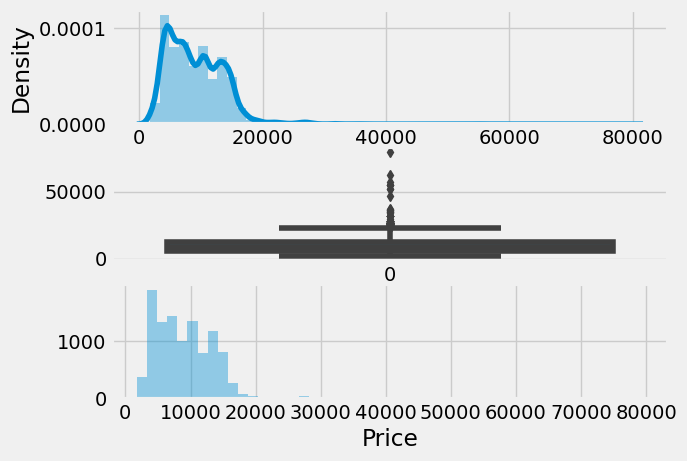

In [90]:
plot(data, 'Price')

- visualiasi tersebut mengalami skewness atau condong kearah kanan, sehingga kita ketahui bahwa ada outlier
- mungkin kita bisa menggunakan pendekatan IQR, jadi outlier tersebut akan diubah menjadi nilai batas atas iqr

In [91]:
q3 = data['Price'].quantile(0.75)
q1 = data['Price'].quantile(0.25)

iqr = q3-q1

maximun = q3 + 1.5*iqr
minimum = q1 - 1.5*iqr

In [92]:
print(maximun)

23017.0


In [93]:
print(minimum)

-5367.0


In [94]:
len([prices for prices in data['Price'] if prices > maximun or prices < minimum])#outlier ada 94

94

In [95]:
# replace dengan median karena merupakan nilai tengah

#           syarat/kondisi    output                   else 
data['Price'] = np.where(data['Price']>35000, data['Price'].median(), data['Price'])

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

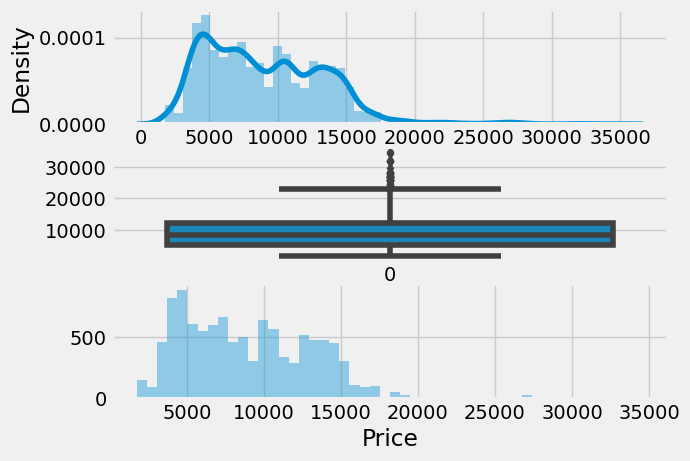

In [96]:
plot(data, 'Price')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

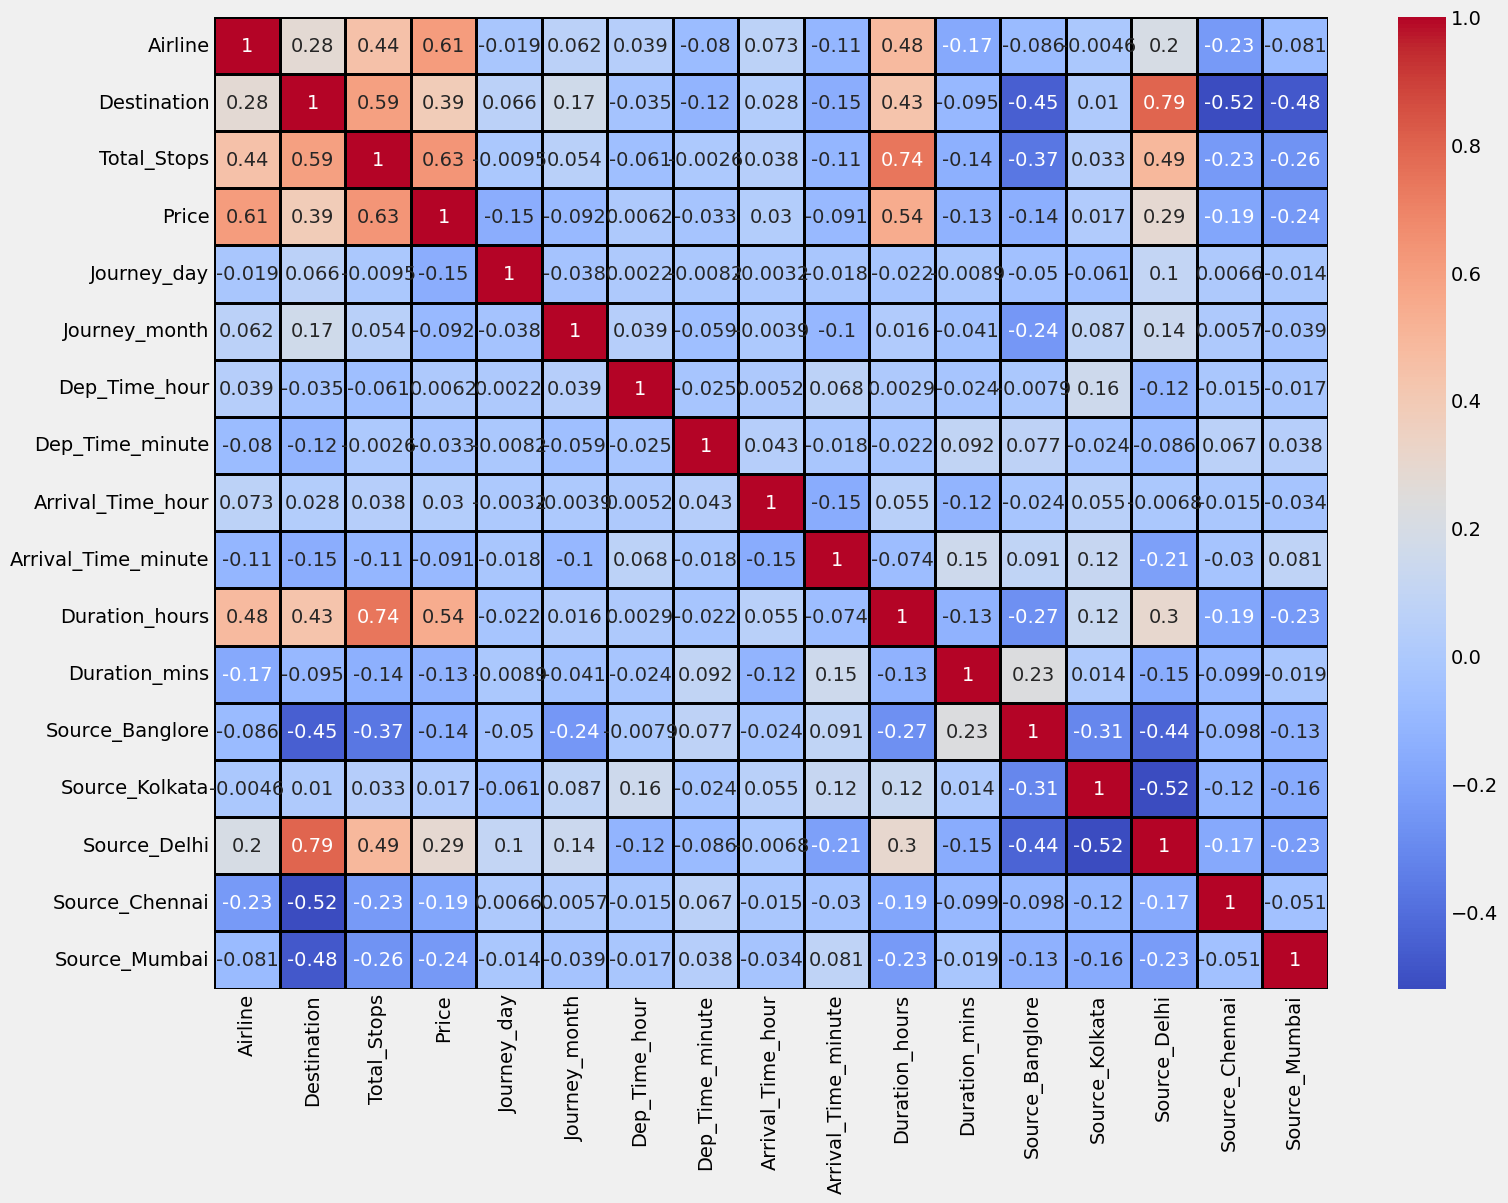

In [97]:
corr = data.corr()
plt.figure(figsize=(16,12))

sns.heatmap(corr, annot=True, cmap='coolwarm', linecolor='black', linewidths=1.0, xticklabels=True, yticklabels=True)
plt.show()

#### Feature Selection

In [98]:
X = data.drop(['Price'], axis=1)

In [99]:
y = data['Price']

In [101]:
imp = mutual_info_regression(X, y)

In [102]:
imp

array([1.31941496, 1.06333182, 0.79033076, 0.3759164 , 0.62311844,
       0.91652433, 0.74995793, 1.14313786, 0.89892609, 1.12676675,
       0.68047381, 0.39141224, 0.4702815 , 0.51641276, 0.14369208,
       0.19603336])

In [103]:
imp_df = pd.DataFrame(imp, index=X.columns)

<IPython.core.display.Javascript object>

In [104]:
imp_df.columns = ['importances']

In [105]:
imp_df.sort_values(by='importances', ascending=False)

,importances
Airline,1.319415
Arrival_Time_hour,1.143138
Duration_hours,1.126767
Destination,1.063332
Dep_Time_hour,0.916524
Arrival_Time_minute,0.898926
Total_Stops,0.790331
Dep_Time_minute,0.749958
Duration_mins,0.680474
Journey_month,0.623118


#### Modelling
- random forest
- decision tree with gini impurity
- decision tree with post and pre-pruning if the decision tree model above is overfit okk

#### Coba Modelling, ingatt Try and Error

In [106]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [107]:
# bikin fungsi untuk menguji atau mengevaluasi modell regresi
def rmse(y, y_pred):
    return round(np.sqrt(mean_squared_error(y, y_pred)), 2)

def bias(y, y_pred):
    return round(np.mean(y_pred - y), 2)

def variance(y, y_pred):
    return np.mean([yi**2 for yi in y_pred]) - np.mean(y_pred)**2

def train_test_metrics(y_tr, y_tt, y_tr_pred, y_tt_pred):
    print('Skor Latih R^2: ', round(r2_score(y_tr, y_tr_pred), 4))
    print('Skor Latih MAE: ', int(mean_absolute_error(y_tr, y_tr_pred)))
    print('Skor Latih MSE: ', "{:.4e}".format(mean_squared_error(y_tr, y_tr_pred)))
    print('Skor Latih RMSE: ', int(rmse(y_tr, y_tr_pred)))
    print('Skor Latih Bias: ', round(bias(y_tr, y_tr_pred), 2))
    print('Skor Latih Variance: ', "{:.4e}".format(np.var(y_tr_pred)))
    print("")
    print('Skor Latih R^2 Score: ', round(r2_score(y_tt, y_tt_pred), 4))
    print('Skor Latih MAE: ', int(mean_absolute_error(y_tt, y_tt_pred)))
    print('Skor Latih MSE: ', "{:.4e}".format(mean_squared_error(y_tt, y_tt_pred)))
    print('Skor Latih RMSE: ', int(rmse(y_tt, y_tt_pred)))
    print('Skor Latih Bias: ', round(bias(y_tt, y_tt_pred), 2))
    print('Skor Latih Variance: ', "{:.4e}".format(np.var(y_tt_pred)))

In [108]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8011 entries, 752 to 7270
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Airline              8011 non-null   int64
 1   Destination          8011 non-null   int64
 2   Total_Stops          8011 non-null   int64
 3   Journey_day          8011 non-null   int32
 4   Journey_month        8011 non-null   int32
 5   Dep_Time_hour        8011 non-null   int32
 6   Dep_Time_minute      8011 non-null   int32
 7   Arrival_Time_hour    8011 non-null   int32
 8   Arrival_Time_minute  8011 non-null   int32
 9   Duration_hours       8011 non-null   int64
 10  Duration_mins        8011 non-null   int64
 11  Source_Banglore      8011 non-null   int64
 12  Source_Kolkata       8011 non-null   int64
 13  Source_Delhi         8011 non-null   int64
 14  Source_Chennai       8011 non-null   int64
 15  Source_Mumbai        8011 non-null   int64
dtypes: int32(6), int64(10)
memo

In [109]:
rf = RandomForestRegressor(n_estimators=100,
                           max_features='sqrt',
                           max_depth=100,
                           min_samples_leaf=4,
                           min_samples_split=10,
                           random_state=1).fit(X_train, y_train)

rf_tr_pred = rf.predict(X_train)
rf_tt_pred = rf.predict(X_test)

In [110]:
# ada perubahan dari segi rumus perhitungan evaluasi model khussu untuk random forest
print('Skor Latih R^2 Score: ', round(r2_score(y_train, rf_tr_pred), 4))
print('Skor Latih MAE: ', round(mean_absolute_error(y_train, rf_tr_pred), 2))
print('Skor Latih MSE: ', "{:.4e}".format(mean_squared_error(y_train, rf_tr_pred)))
print('Skor Latih RMSE: ', round(np.sqrt(mean_squared_error(y_train, rf_tr_pred)), 2))
print('Skor Latih Bias: ', bias(y_train, rf_tr_pred))
print('Skor Latih Variance: ', "{:.4e}".format(np.var(rf_tr_pred)))
print("")
print('Skor Uji R^2 Score: ', round(r2_score(y_test, rf_tt_pred), 4))
print('Skor Uji MAE: ', round(mean_absolute_error(y_test, rf_tt_pred), 2))
print('Skor Uji MSE: ', "{:.4e}".format(mean_squared_error(y_test, rf_tt_pred)))
print('Skor Uji RMSE: ', round(np.sqrt(mean_squared_error(y_test, rf_tt_pred)), 2))
print('Skor Uji Bias: ', round(bias(y_test, rf_tt_pred), 2))
print('Skor Uji Variance: ', "{:.4e}".format(np.var(rf_tt_pred)))

Skor Latih R^2 Score:  0.8686
Skor Latih MAE:  1060.09
Skor Latih MSE:  2.4722e+06


<IPython.core.display.Javascript object>

Skor Latih RMSE:  1572.31


<IPython.core.display.Javascript object>

Skor Latih Bias:  -2.55


<IPython.core.display.Javascript object>

Skor Latih Variance:  1.4073e+07

Skor Uji R^2 Score:  0.8114
Skor Uji MAE:  1253.55
Skor Uji MSE:  3.6724e+06


<IPython.core.display.Javascript object>

Skor Uji RMSE:  1916.34


<IPython.core.display.Javascript object>

Skor Uji Bias:  47.53


<IPython.core.display.Javascript object>

Skor Uji Variance:  1.4007e+07


In [111]:
top_feat_rf = pd.DataFrame(rf.feature_importances_,
                           index=X_train.columns,
                           columns=['importance']).sort_values('importance', ascending=False)

top_feat_rf.head(20)

<IPython.core.display.Javascript object>

,importance
Duration_hours,0.263418
Total_Stops,0.205668
Airline,0.195262
Journey_day,0.088079
Journey_month,0.061570
Destination,0.030034
Arrival_Time_hour,0.027316
Dep_Time_hour,0.025725
Arrival_Time_minute,0.021498
Dep_Time_minute,0.020850


In [112]:
top_feat_rf.value_counts()

importance
0.002229      1
0.006204      1
0.009529      1
0.010776      1
0.011175      1
0.020669      1
0.020850      1
0.021498      1
0.025725      1
0.027316      1
0.030034      1
0.061570      1
0.088079      1
0.195262      1
0.205668      1
0.263418      1
Name: count, dtype: int64

In [113]:
dtr = DecisionTreeRegressor(random_state=42).fit(X_train, y_train)
y_tr_dtr_pred = dtr.predict(X_train)
y_tt_dtr_pred = dtr.predict(X_test)

In [114]:
train_test_metrics(y_train, y_test, y_tr_dtr_pred, y_tt_dtr_pred)
print("")

dtr_mse, dtr_bias, dtr_var = bias_variance_decomp(dtr, X_train.values, y_train.values, X_test.values, y_test.values, loss='mse', random_seed=42)
print('Rata-rata loss yang diharapkan: ', "{:.4e}".format(dtr_mse))
print('Rata-rata bias: ', "{:.4e}".format(dtr_bias))
print('Rata-rata varians: ', "{:.4e}".format(dtr_var))

Skor Latih R^2:  0.9666
Skor Latih MAE:  309
Skor Latih MSE:  6.2834e+05


<IPython.core.display.Javascript object>

Skor Latih RMSE:  792


<IPython.core.display.Javascript object>

Skor Latih Bias:  -0.0


<IPython.core.display.Javascript object>

Skor Latih Variance:  1.8180e+07

Skor Latih R^2 Score:  0.6808
Skor Latih MAE:  1413
Skor Latih MSE:  6.2142e+06


<IPython.core.display.Javascript object>

Skor Latih RMSE:  2492


<IPython.core.display.Javascript object>

Skor Latih Bias:  101.61


<IPython.core.display.Javascript object>

Skor Latih Variance:  1.8911e+07

Rata-rata loss yang diharapkan:  6.2542e+06
Rata-rata bias:  3.6685e+06
Rata-rata varians:  2.5857e+06


In [115]:
# Membuat pipeline lalu mencari nilai parameter terbaik dengan cv

# argumen squared itu false
rmse_1 = partial(mean_squared_error, squared=False)

# buat skor
rmse_scorer = make_scorer(rmse_1, greater_is_better=False) #skor lebih rendah is good

In [116]:
# pipeline tabungnya
pipe_tree = make_pipeline(tree.DecisionTreeRegressor(random_state=1))

In [117]:
dtr_2 = DecisionTreeRegressor()
param_grid = [{ #daftar parameter untuk cv nanti
               'decisiontreeregressor__max_depth': [1, 2, 5, 10, 15, 20],
               'decisiontreeregressor__min_samples_leaf': [1, 5, 10, 20, 50],
               'decisiontreeregressor__max_leaf_nodes': [5, 10, 20, 50, 100],
               'decisiontreeregressor__min_samples_split': [5, 10, 20, 40]
             }]

In [118]:
# cv
gs = GridSearchCV(pipe_tree, param_grid=param_grid, cv=10, scoring=rmse_scorer, verbose=1) #cari parameter terbaik
gs.fit(X_train, y_train)
print(f"Hasil latih: {gs.best_score_}")
print(gs.best_estimator_)

Fitting 10 folds for each of 600 candidates, totalling 6000 fits
Hasil latih: -2079.251750637186
Pipeline(steps=[('decisiontreeregressor',
                 DecisionTreeRegressor(max_depth=15, max_leaf_nodes=100,
                                       min_samples_split=20, random_state=1))])


In [119]:
gs_model = gs.best_estimator_
gs_model.fit(X_train, y_train)
gs_tr_pred = gs_model.predict(X_train)
gs_tt_pred = gs_model.predict(X_test)

In [120]:
train_test_metrics(y_train, y_test, gs_tr_pred, gs_tt_pred)
print("")
gs_mse, gs_bias, gs_var = bias_variance_decomp(gs_model, X_train.values, y_train.values, X_test.values, y_test.values, loss='mse', random_seed=42)
print('Average expected loss: ', "{:.4e}".format(gs_mse))
print('Average bias: ', "{:.4e}".format(gs_bias))
print('Average variance: ', "{:.4e}".format(gs_var))

Skor Latih R^2:  0.8132
Skor Latih MAE:  1346
Skor Latih MSE:  3.5137e+06


<IPython.core.display.Javascript object>

Skor Latih RMSE:  1874


<IPython.core.display.Javascript object>

Skor Latih Bias:  -0.0


<IPython.core.display.Javascript object>

Skor Latih Variance:  1.5294e+07

Skor Latih R^2 Score:  0.7585
Skor Latih MAE:  1447
Skor Latih MSE:  4.7011e+06


<IPython.core.display.Javascript object>

Skor Latih RMSE:  2168


<IPython.core.display.Javascript object>

Skor Latih Bias:  55.8


<IPython.core.display.Javascript object>

Skor Latih Variance:  1.5626e+07

Average expected loss:  4.8888e+06
Average bias:  3.7581e+06
Average variance:  1.1308e+06


In [121]:
dtr_3 = DecisionTreeRegressor(max_depth=15,
                              max_leaf_nodes=100,
                              min_samples_leaf=10,
                              min_samples_split=20,
                              random_state=1).fit(X_train, y_train)

In [122]:
top_feat_dtr = pd.DataFrame(dtr_3.feature_importances_,
                            index=X_train.columns,
                            columns=['importance']).sort_values('importance', ascending=False)

<IPython.core.display.Javascript object>

In [123]:
top_feat_dtr.head(20)

,importance
Duration_hours,0.576603
Airline,0.161266
Journey_day,0.123918
Journey_month,0.045976
Total_Stops,0.027319
Destination,0.017720
Arrival_Time_hour,0.011397
Dep_Time_minute,0.011175
Dep_Time_hour,0.009157
Duration_mins,0.007201


In [124]:
random_grid = {'n_estimators': [20, 50, 100, 150, 200], #parameter cv
               'max_depth': [10, 20, 50, 100],
               'min_samples_split': [2, 5, 10],
               'min_samples_leaf': [1, 2, 4]}
rf = RandomForestRegressor()
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
rf_random.fit(X_train, y_train)
rf_random.best_params_

Fitting 3 folds for each of 100 candidates, totalling 300 fits


{'n_estimators': 150,
 'min_samples_split': 10,
 'min_samples_leaf': 1,
 'max_depth': 100}

In [125]:
best_random = rf_random.best_estimator_
rf_random_tr = best_random.predict(X_train)
rf_random_tt = best_random.predict(X_test)

print('Skor Latih R^2: ', round(r2_score(y_train, rf_random_tr), 4))
print('Skor Latih MAE: ', round(mean_absolute_error(y_train, rf_random_tr), 2))
print('Skor Latih MSE: ', "{:.4e}".format(mean_squared_error(y_train, rf_random_tr)))
print('Skor Latih RMSE: ', round(np.sqrt(mean_squared_error(y_train, rf_random_tr)), 2))
print('Skor Latih Bias: ', round(bias(y_train, rf_random_tr), 2))
print('Skor Latih Variance: ', "{:.4e}".format(np.var(rf_random_tr)))
print("")
print('Skor Uji R^2: ', round(r2_score(y_test, rf_random_tt), 4))
print('Skor Uji MAE: ', round(mean_absolute_error(y_test, rf_random_tt), 2))
print('Skor Uji MSE: ', "{:.4e}".format(mean_squared_error(y_test, rf_random_tt)))
print('Skor Uji RMSE: ', round(np.sqrt(mean_squared_error(y_test, rf_random_tt)), 2))
print('Skor Uji Bias: ', round(bias(y_test, rf_random_tt), 2))
print('Skor Uji Variance: ', "{:.4e}".format(np.var(rf_random_tt)))

Skor Latih R^2:  0.9146
Skor Latih MAE:  811.25
Skor Latih MSE:  1.6063e+06


<IPython.core.display.Javascript object>

Skor Latih RMSE:  1267.4


<IPython.core.display.Javascript object>

Skor Latih Bias:  6.06


<IPython.core.display.Javascript object>

Skor Latih Variance:  1.6062e+07

Skor Uji R^2:  0.8293
Skor Uji MAE:  1142.75
Skor Uji MSE:  3.3222e+06


<IPython.core.display.Javascript object>

Skor Uji RMSE:  1822.68


<IPython.core.display.Javascript object>

Skor Uji Bias:  86.03


<IPython.core.display.Javascript object>

Skor Uji Variance:  1.6006e+07


In [126]:
top_feat_rf_rcv = pd.DataFrame(best_random.feature_importances_,
                           index=X_train.columns,
                           columns=['importance']).sort_values('importance', ascending=False)
top_feat_rf_rcv.head(20)

<IPython.core.display.Javascript object>

,importance
Duration_hours,0.509694
Airline,0.148454
Journey_day,0.112302
Journey_month,0.066368
Total_Stops,0.026238
Dep_Time_hour,0.023546
Arrival_Time_hour,0.023194
Arrival_Time_minute,0.020286
Dep_Time_minute,0.019036
Duration_mins,0.017951


#### GridSearch CV terhadap Random Forest

In [127]:
param_grid2 = { #atribut cv
    'bootstrap': [True],
    'max_depth': [80, 90, 100, 110],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300, 1000]
}

rf = RandomForestRegressor()
grid_search4 = GridSearchCV(estimator=rf, param_grid=param_grid2, cv=3, n_jobs=-1, verbose=2)
grid_search4.fit(X_train, y_train)
grid_search4.best_params_

Fitting 3 folds for each of 288 candidates, totalling 864 fits


{'bootstrap': True,
 'max_depth': 80,
 'max_features': 3,
 'min_samples_leaf': 3,
 'min_samples_split': 8,
 'n_estimators': 1000}

In [128]:
best_grid2 = grid_search4.best_estimator_
rf_gs_tr = best_grid2.predict(X_train)
rf_gs_tt = best_grid2.predict(X_test)

print('Skor Latih R^2: ', round(r2_score(y_train, rf_gs_tr), 4))
print('Skor Latih MAE: ', round(mean_absolute_error(y_train, rf_gs_tr), 2))
print('Skor Latih MSE: ', "{:.4e}".format(mean_squared_error(y_train, rf_gs_tr)))
print('Skor Latih RMSE: ', round(np.sqrt(mean_squared_error(y_train, rf_gs_tr)), 2))
print('Skor Latih Bias: ', round(bias(y_train, rf_gs_tr), 2))
print('Skor Latih Variance: ', "{:.4e}".format(np.var(rf_gs_tr)))
print("")
print('Skor Uji R^2: ', round(r2_score(y_test, rf_gs_tt), 4))
print('Skor Uji MAE: ', round(mean_absolute_error(y_test, rf_gs_tt), 2))
print('Skor Uji MSE: ', "{:.4e}".format(mean_squared_error(y_test, rf_gs_tt)))
print('Skor Uji RMSE: ', round(np.sqrt(mean_squared_error(y_test, rf_gs_tt)), 2))
print('Skor Uji Bias: ', round(bias(y_test, rf_gs_tt), 2))
print('Skor Uji Variance: ', "{:.4e}".format(np.var(rf_gs_tt)))

Skor Latih R^2:  0.8705
Skor Latih MAE:  1057.07
Skor Latih MSE:  2.4360e+06


<IPython.core.display.Javascript object>

Skor Latih RMSE:  1560.77


<IPython.core.display.Javascript object>

Skor Latih Bias:  -0.13


<IPython.core.display.Javascript object>

Skor Latih Variance:  1.3832e+07

Skor Uji R^2:  0.8036
Skor Uji MAE:  1285.17
Skor Uji MSE:  3.8228e+06


<IPython.core.display.Javascript object>

Skor Uji RMSE:  1955.19


<IPython.core.display.Javascript object>

Skor Uji Bias:  50.38


<IPython.core.display.Javascript object>

Skor Uji Variance:  1.3674e+07


In [129]:
top_feat_rf_gs = pd.DataFrame(best_grid2.feature_importances_,
                              index=X_train.columns,
                              columns=['importance']).sort_values('importance', ascending=False)
top_feat_rf_gs.head(20)

<IPython.core.display.Javascript object>

,importance
Duration_hours,0.227813
Airline,0.207606
Total_Stops,0.186806
Journey_day,0.086152
Journey_month,0.059330
Destination,0.038946
Arrival_Time_hour,0.033820
Dep_Time_hour,0.029977
Duration_mins,0.026004
Arrival_Time_minute,0.025364


#### Hyper Tuning

In [130]:
# last percobaan dengan random forest regressor
rf_final = RandomForestRegressor(n_estimators=300,
                           max_features=3,
                           max_depth=90,
                           bootstrap= True,
                           min_samples_leaf=3,
                           min_samples_split=8,
                           random_state=1).fit(X_train, y_train)
rf_final.fit(X_train, y_train)

rf_best_tr_pred = rf_final.predict(X_train)
rf_best_tt_pred = rf_final.predict(X_test)

In [131]:
print('Skor Latih R^2 Score: ', round(r2_score(y_train, rf_best_tr_pred), 4))
print('Skor Latih MAE: ', round(mean_absolute_error(y_train, rf_best_tr_pred), 2))
print('Skor Latih MSE: ', "{:.4e}".format(mean_squared_error(y_train, rf_best_tr_pred)))
print('Skor Latih RMSE: ', round(np.sqrt(mean_squared_error(y_train, rf_best_tr_pred)), 2))
print('Skor Latih Bias: ', bias(y_train, rf_best_tr_pred))
print('Skor Latih Variance: ', "{:.4e}".format(np.var(rf_best_tr_pred)))
print("")
print('Skor Uji R^2 Score: ', round(r2_score(y_test, rf_best_tt_pred), 4))
print('Skor Uji MAE: ', round(mean_absolute_error(y_test, rf_best_tt_pred), 2))
print('Skor Uji MSE: ', "{:.4e}".format(mean_squared_error(y_test, rf_best_tt_pred)))
print('Skor Uji RMSE: ', round(np.sqrt(mean_squared_error(y_test, rf_best_tt_pred)), 2))
print('Skor Uji Bias: ', round(bias(y_test, rf_best_tt_pred), 2))
print('Skor Uji Variance: ', "{:.4e}".format(np.var(rf_best_tt_pred)))

Skor Latih R^2 Score:  0.8706
Skor Latih MAE:  1056.64
Skor Latih MSE:  2.4340e+06


<IPython.core.display.Javascript object>

Skor Latih RMSE:  1560.13


<IPython.core.display.Javascript object>

Skor Latih Bias:  -1.18


<IPython.core.display.Javascript object>

Skor Latih Variance:  1.3868e+07

Skor Uji R^2 Score:  0.8053
Skor Uji MAE:  1281.36
Skor Uji MSE:  3.7911e+06


<IPython.core.display.Javascript object>

Skor Uji RMSE:  1947.07


<IPython.core.display.Javascript object>

Skor Uji Bias:  50.04


<IPython.core.display.Javascript object>

Skor Uji Variance:  1.3748e+07


#### Gradient Boost Regresion Tree

In [132]:
gbrt = GradientBoostingRegressor(n_estimators=100).fit(X_train, y_train) #objek dan langsung latih

y_gbrt_tr_pred = gbrt.predict(X_train)
y_gbrt_tt_pred = gbrt.predict(X_test)

In [133]:
xgb = XGBRegressor(objective ='reg:squarederror', 
                       n_estimators = 100, 
                       learning_rate = 0.1,
                       max_depth = 3,
                       min_child_weight = 1,
                       gamma = 0,
                       subsample = 0.8,
                       colsample_bytree = 0.8,
                       reg_alpha = 0,
                       reg_lambda = 1,
                       random_state = 42)

In [134]:
xgb.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.8, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=0, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=1, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [135]:
y_xg_tr_pred = xgb.predict(X_train)
y_xg_tt_pred = xgb.predict(X_test)

In [136]:
train_test_metrics(y_train, y_test, y_xg_tr_pred, y_xg_tt_pred)
print("")
xg_mse, xg_bias, xg_var = bias_variance_decomp(xgb, X_train.values, y_train.values, X_test.values, y_test.values, loss='mse', random_seed=42)
print('Average expected loss: ', "{:.4e}".format(xg_mse))
print('Average bias: ', "{:.4e}".format(xg_bias))
print('Average variance: ', "{:.4e}".format(xg_var))

Skor Latih R^2:  0.7758
Skor Latih MAE:  1484
Skor Latih MSE:  4.2165e+06


<IPython.core.display.Javascript object>

Skor Latih RMSE:  2053


<IPython.core.display.Javascript object>

Skor Latih Bias:  2.33


<IPython.core.display.Javascript object>

Skor Latih Variance:  1.3180e+07

Skor Latih R^2 Score:  0.7606
Skor Latih MAE:  1521
Skor Latih MSE:  4.6614e+06


<IPython.core.display.Javascript object>

Skor Latih RMSE:  2159


<IPython.core.display.Javascript object>

Skor Latih Bias:  49.9


<IPython.core.display.Javascript object>

Skor Latih Variance:  1.3309e+07

Average expected loss:  4.7592e+06
Average bias:  4.6679e+06
Average variance:  9.1359e+04


#### Top Feature
Berdasarkan keseluruhan informasi dari fitur yang memiliki importance dan fitur importance dari setiap model, maka dapat diketahui bahwa:
 - fitur Duration_hours memiliki importance yang paling tinggi, yang artinya fitur ini berpengaruh terhdap model
 - lalu disusul dengan fitur airline, dan Total_stops
    
Sehingga dapat disimpulkan bahwa harga tiket pesawat akan semakin mahal ketika:
 - jam penerbangan semakin bertambah
 - menggunakan suatu maskapai tertentu
 - dan semakin banyak transit atau pemberhentian pesawat maka harga tiket akan semakin mahal

###  Hasil Evaluasi dari setiap Model
dillihat dari nilai R2 score dan RMSE, karena ingin menunjukkan seberapa baik model dapat menjelaskan variasi dalam data target,

In [141]:
list_r2_scores = [
    [r2_score(y_train, y_tr_dtr_pred), r2_score(y_test, y_tt_dtr_pred)],  # Decision Tree Regressor
    [r2_score(y_train, gs_tr_pred), r2_score(y_test, gs_tt_pred)], # Decision Tree GridSearchCV:
    [r2_score(y_train, rf_tr_pred), r2_score(y_test, rf_tt_pred)], # Random Forest Regressor
    [r2_score(y_train, rf_random_tr), r2_score(y_test, rf_random_tt)], # Random Forest Regressor with RandomSearchCV
    [r2_score(y_train, rf_gs_tr), r2_score(y_test, rf_gs_tt)], # Random Forest Regressor with GridSearchCV
    [r2_score(y_train, rf_best_tr_pred), r2_score(y_test, rf_best_tt_pred)], # Final Random Forest Regressor
    [r2_score(y_train, y_xg_tr_pred), r2_score(y_test, y_xg_tt_pred)] # GradienBoosting with XGBoost
]

In [145]:
list_rmse = [
    [rmse(y_train, y_tr_dtr_pred), rmse(y_test, y_tt_dtr_pred)],  # Decision Tree Regressor
    [rmse(y_train, gs_tr_pred), rmse(y_test, gs_tt_pred)], # Decision Tree GridSearchCV:
    [rmse(y_train, rf_tr_pred), rmse(y_test, rf_tt_pred)], # Random Forest Regressor
    [rmse(y_train, rf_random_tr), rmse(y_test, rf_random_tt)], # Random Forest Regressor with RandomSearchCV
    [rmse(y_train, rf_gs_tr), rmse(y_test, rf_gs_tt)], # Random Forest Regressor with GridSearchCV
    [rmse(y_train, rf_best_tr_pred), rmse(y_test, rf_best_tt_pred)], # Final Random Forest Regressor
    [rmse(y_train, y_xg_tr_pred), rmse(y_test, y_xg_tt_pred)] # GradienBoosting with XGBoost
]

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [146]:
indeks = ["Decision Tree (DTR)",
          "DTR with GridSearchCV",
          "Random Forest (RF)",
          "RF with RandomSearchCV",
          "RF with GridSearchCV",
          "Final Random Forest",
          "XGBoost"
         ]

In [147]:
r2_df = pd.DataFrame(data=list_r2_scores, index=indeks, columns=["Training R2", "Testing R2"])

rmse_df = pd.DataFrame(data=list_rmse, index=indeks, columns=["Training RMSE", "Testing RMSE"])

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [148]:
eval_df = pd.concat([r2_df, rmse_df], axis=1)

<IPython.core.display.Javascript object>

In [150]:
eval_df

,Training R2,Testing R2,Training RMSE,Testing RMSE
Decision Tree (DTR),0.966592,0.680793,792.68,2492.83
DTR with GridSearchCV,0.813178,0.758516,1874.50,2168.20
Random Forest (RF),0.868557,0.811360,1572.31,1916.34
RF with RandomSearchCV,0.914594,0.829349,1267.40,1822.68
RF with GridSearchCV,0.870480,0.803634,1560.77,1955.19
Final Random Forest,0.870586,0.805262,1560.13,1947.07
XGBoost,0.775814,0.760555,2053.40,2159.03


### Kesimpulan Model Terbaik
Dari semua model yang dievaluasi, Random Forest (RF) dengan RandomSearchCV dapat dianggap sebagai model terbaik untuk prediksi harga tiket pesawat, karena:

1. Kinerja Model: RF dengan RandomSearchCV memberikan R2 Score tertinggi pada testing set (0.829) dibandingkan dengan model lainnya, menunjukkan kemampuan yang baik dalam menggeneralisasi data baru.
2. RMSE: RF dengan RandomSearchCV memiliki RMSE testing terendah (1822.68), artinya model memiliki akurasi yang baik dalam memprediksi harga tiket pesawat.
3. Penanganan Overfitting: Model ini menunjukkan kemampuan yang baik dalam mengatasi overfitting dibandingkan dengan model lain, dengan selisih yang lebih kecil antara R2 training dan R2 testing.

Oleh karena itu, aku rekomendasi untuk menggunakan Random Forest (RF) dengan RandomSearchCV sebagai model utama untuk prediksi harga tiket pesawat, karena kombinasi kinerja yang baik dan penanganan overfitting yang memadai.

In [153]:
# dumping model rf
import pickle

file_rf = open(r'kode/projek/Tiket_Pesawat/tiket_pesawat_RFCV.pkl', 'wb')

In [154]:
pickle.dump(rf_random, file_rf)

In [ ]:
pickle.load()

In [157]:
data.head(5)

,Airline,Destination,Total_Stops,Price,Journey_day,Journey_month,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hours,Duration_mins,Source_Banglore,Source_Kolkata,Source_Delhi,Source_Chennai,Source_Mumbai
0,3,2,0,3897.0,24,3,22,20,1,10,2,50,1,0,0,0,0
1,7,3,2,7662.0,1,5,5,50,13,15,7,25,0,1,0,0,0
2,10,4,2,13882.0,9,6,9,25,4,25,19,0,0,0,1,0,0
3,3,3,1,6218.0,12,5,18,5,23,30,5,25,0,1,0,0,0
4,3,2,1,13302.0,1,3,16,50,21,35,4,45,1,0,0,0,0
